# Purpose of the Code

The goal of this notebook is to extract the Maximum Voluntary Contraction (MVC) value from EMG signal recorded from a specific muscle using Myo system. The code processes the raw EMG data, identifies the segment corresponding to the peak muscle activation, and computes the maximum amplitude.

## Environment Setup

In [1]:
# pip install libemg  # Required only if you have never installed the libemg package
# pip install --upgrade paramiko cryptography  # Needed during first-time installation of libemg to resolve dependencies

In [2]:
import os
import pandas as pd
import numpy as np
import sys
sys.path.append('../../lib')
from import_emg_file import import_data_from_myo
from myo_utils import myo_dataframe_edit, myo_extract_muscle_emg
from emg_utils import plot_emg_signal, emg_filters, compute_MVC

In [3]:
# Parameters
channel_numbers = [4]  # Possible channels: from 1 to 8
channel_names = [f"channel_{num}" for num in channel_numbers] # Create channel of interest names
fs = 200 # Frequency of Myo armband
fs_list = []  # Initialize list to store sampling frequencies

# Paths for input and output
input_folder = f'../../data/acquisitions/myo/05_26/_mvc/'  # Input folder with raw data
full_path = os.path.join('../../data/mvc_values/myo/S01_05_26/datasets', f'MVC_S01_{channel_names[0]}.csv') # output folder and file name

# Loading Data Files

In [4]:
dataframes = import_data_from_myo(input_folder)  # Import raw data from Myo folder
dataframes = [myo_dataframe_edit(df) for df in dataframes]  # Format each imported dataframe

In [5]:
muscle_emg_raw, emg_time = myo_extract_muscle_emg(dataframes, channel_names, fs)  # Extract EMG signals and timestamps for the specified channels
# for channel in channel_names:
    # plot_emg_signal(muscle_emg_raw[channel][0], emg_time[0], title=f"{channel} EMG Raw Signal #1")  # Plot raw EMG signal

# EMG Signal Analysis

## Filtering, Rectification, Smoothing and Normalization

In [6]:
for time in emg_time:
    fs_list.append(fs)

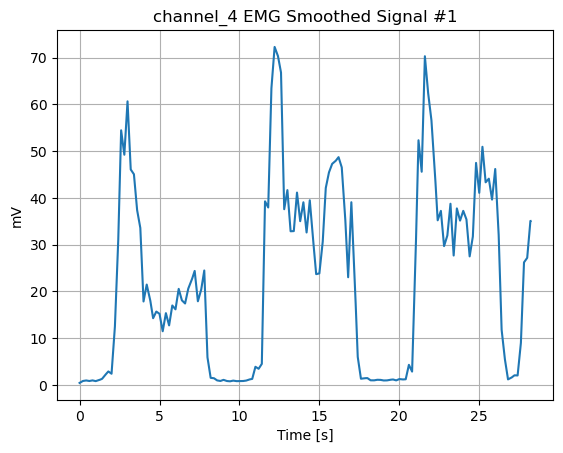

In [7]:
muscle_emg_filtered, _, muscle_emg_smoothed = emg_filters(muscle_emg_raw, emg_time, fs_list)
for channel in channel_names:
    plot_emg_signal(muscle_emg_smoothed[channel][0], emg_time[0], 
                    title=f"{channel} EMG Smoothed Signal #1")  # Plot normalized EMG signal

# Compute MVC

In [8]:
mvc = compute_MVC(muscle_emg_smoothed[channel_names[0]][0], fs, window=0.1)

# Export MVC

In [9]:
mvc_dict = {channel_names[0]: mvc}
mvc_df = pd.DataFrame.from_dict(mvc_dict, orient='index', columns=['MVC'])
#print(mvc_df)

In [10]:
mvc_df.to_csv(full_path)